In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

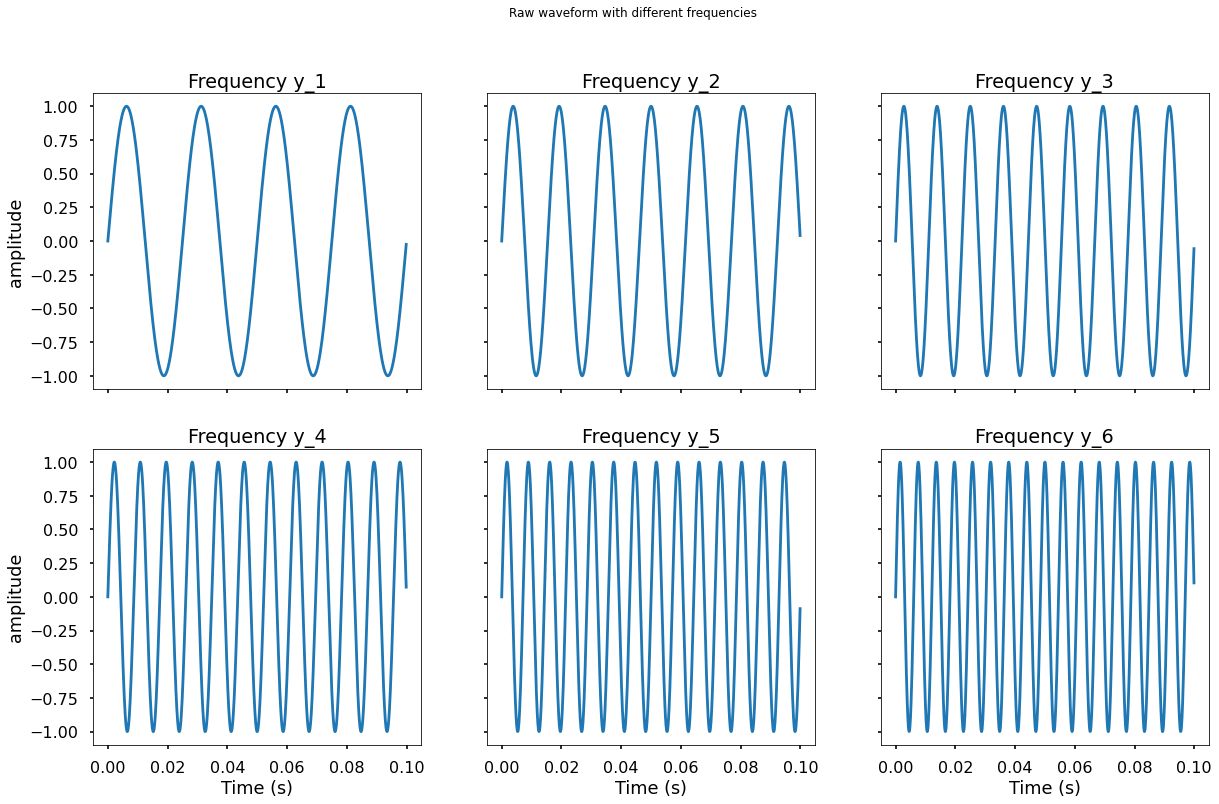

In [7]:
# Generate raw waveform signals for different frequencies
# sampling rate
sr = 1000.0

# sampling interval
ts = 1.0 / sr
t = np.arange(0, 1, ts)
ps = 0 #phase shift

t *= 0.1

# frequency of the signal
freq_1 = 80
freq_2 = 130
freq_3 = 180
freq_4 = 230
freq_5 = 280
freq_6 = 330

y_1 = np.sin(1 * np.pi * freq_1 * t + ps)
y_2 = np.sin(1 * np.pi * freq_2 * t)
y_3 = np.sin(1 * np.pi * freq_3 * t)
y_4 = np.sin(1 * np.pi * freq_4 * t)
y_5 = np.sin(1 * np.pi * freq_5 * t)
y_6 = np.sin(1 * np.pi * freq_6 * t)

fig, axs = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Raw waveform with different frequencies')
axs[0, 0].plot(t, y_1)
axs[0, 0].set_title('Frequency y_1')
axs[0, 1].plot(t, y_2)
axs[0, 1].set_title('Frequency y_2')
axs[0, 2].plot(t, y_3)
axs[0, 2].set_title('Frequency y_3')
axs[1, 0].plot(t, y_4)
axs[1, 0].set_title('Frequency y_4')
axs[1, 1].plot(t, y_5)
axs[1, 1].set_title('Frequency y_5')
axs[1, 2].plot(t, y_6)
axs[1, 2].set_title('Frequency y_6')

for ax in axs.flat:
    ax.set(xlabel='Time (s)', ylabel='amplitude')

# Hide x labels and tick labels for all but bottom plot.
for ax in fig.get_axes():
    ax.label_outer()


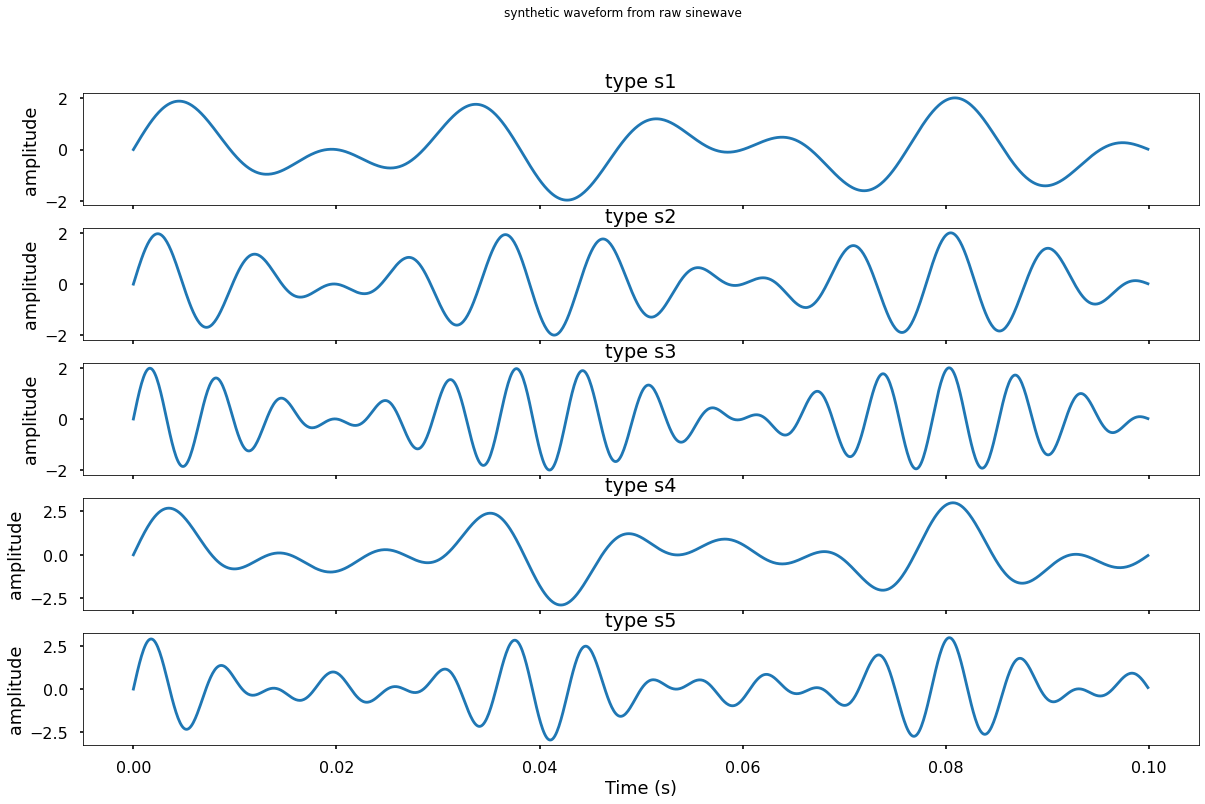

In [3]:
s1 = y_1 + y_2
s2 = y_3 + y_4
s3 = y_5 + y_6
s4 = y_1 + y_2 + y_3
s5 = y_4 + y_5 + y_6

fig, axs = plt.subplots(5, 1, figsize=(20, 12))
fig.suptitle('synthetic waveform from raw sinewave')

axs[0].plot(t, s1)
axs[0].set_title('type s1')
axs[1].plot(t, s2)
axs[1].set_title('type s2')
axs[2].plot(t, s3)
axs[2].set_title('type s3')
axs[3].plot(t, s4)
axs[3].set_title('type s4')
axs[4].plot(t, s5)
axs[4].set_title('type s5')

for ax in axs.flat:
    ax.set(xlabel='Time (s)', ylabel='amplitude')

# Hide x labels and tick labels for all but bottom plot.
for ax in fig.get_axes():
    ax.label_outer()

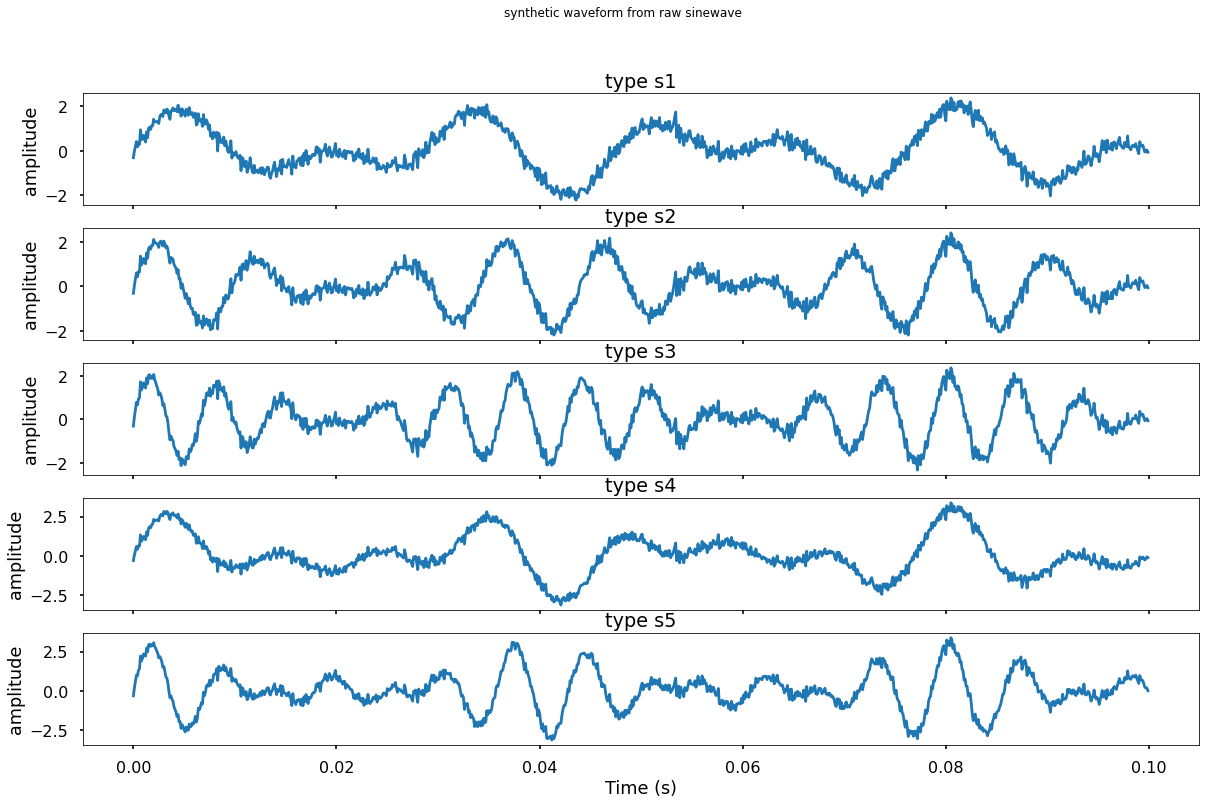

In [4]:
# Add normal noise
noise = np.random.normal(0, 0.2, len(t))

fig, axs = plt.subplots(5, 1, figsize=(20, 12))
fig.suptitle('synthetic waveform from raw sinewave')

axs[0].plot(t, s1 + noise)
axs[0].set_title('type s1')
axs[1].plot(t, s2 + noise)
axs[1].set_title('type s2')
axs[2].plot(t, s3 + noise)
axs[2].set_title('type s3')
axs[3].plot(t, s4 + noise)
axs[3].set_title('type s4')
axs[4].plot(t, s5 + noise)
axs[4].set_title('type s5')

for ax in axs.flat:
    ax.set(xlabel='Time (s)', ylabel='amplitude')

# Hide x labels and tick labels for all but bottom plot.
for ax in fig.get_axes():
    ax.label_outer()

In [5]:
# Generate data npy data for siamense network training
window_size = 300
step = 20

tmp_data = []
for i in range(0, len(t)-window_size, step):
    tmp_data.append(s1[i: i + window_size])
npy_data = tmp_data
for i in range(8):
    npy_data = np.concatenate((npy_data, np.array(tmp_data)), axis = 0)

tmp_data = []
for i in range(0, len(t)-window_size, step):
    tmp_data.append(s2[i: i + window_size])
for i in range(9):
    npy_data = np.concatenate((npy_data, np.array(tmp_data)), axis = 0)

tmp_data = []
for i in range(0, len(t)-window_size, step):
    tmp_data.append(s3[i: i + window_size])
for i in range(9):
    npy_data = np.concatenate((npy_data, np.array(tmp_data)), axis = 0)

tmp_data = []
for i in range(0, len(t)-window_size, step):
    tmp_data.append(s4[i: i + window_size])
for i in range(9):
    npy_data = np.concatenate((npy_data, np.array(tmp_data)), axis = 0)

tmp_data = []
for i in range(0, len(t)-window_size, step):
    tmp_data.append(s5[i: i + window_size])
for i in range(9):
    npy_data = np.concatenate((npy_data, np.array(tmp_data)), axis = 0)

# add white noise to make signal different
noise = np.random.normal(0, 0.2, npy_data.shape)
npy_data += noise

# label for classificaiton
num_of_class = npy_data.shape[0] // 5
Y = [0] * num_of_class
Y += [1] * num_of_class
Y += [2] * num_of_class
Y += [3] * num_of_class
Y += [4] * num_of_class
Y = np.array(Y)
Y = Y.reshape((-1,1))

npy_data = np.concatenate((npy_data, Y), axis = 1)


# save the dataset, the last colomn is the label y.
with open('synthetic_dataset.npy', 'wb') as f:
    np.save(f, npy_data)

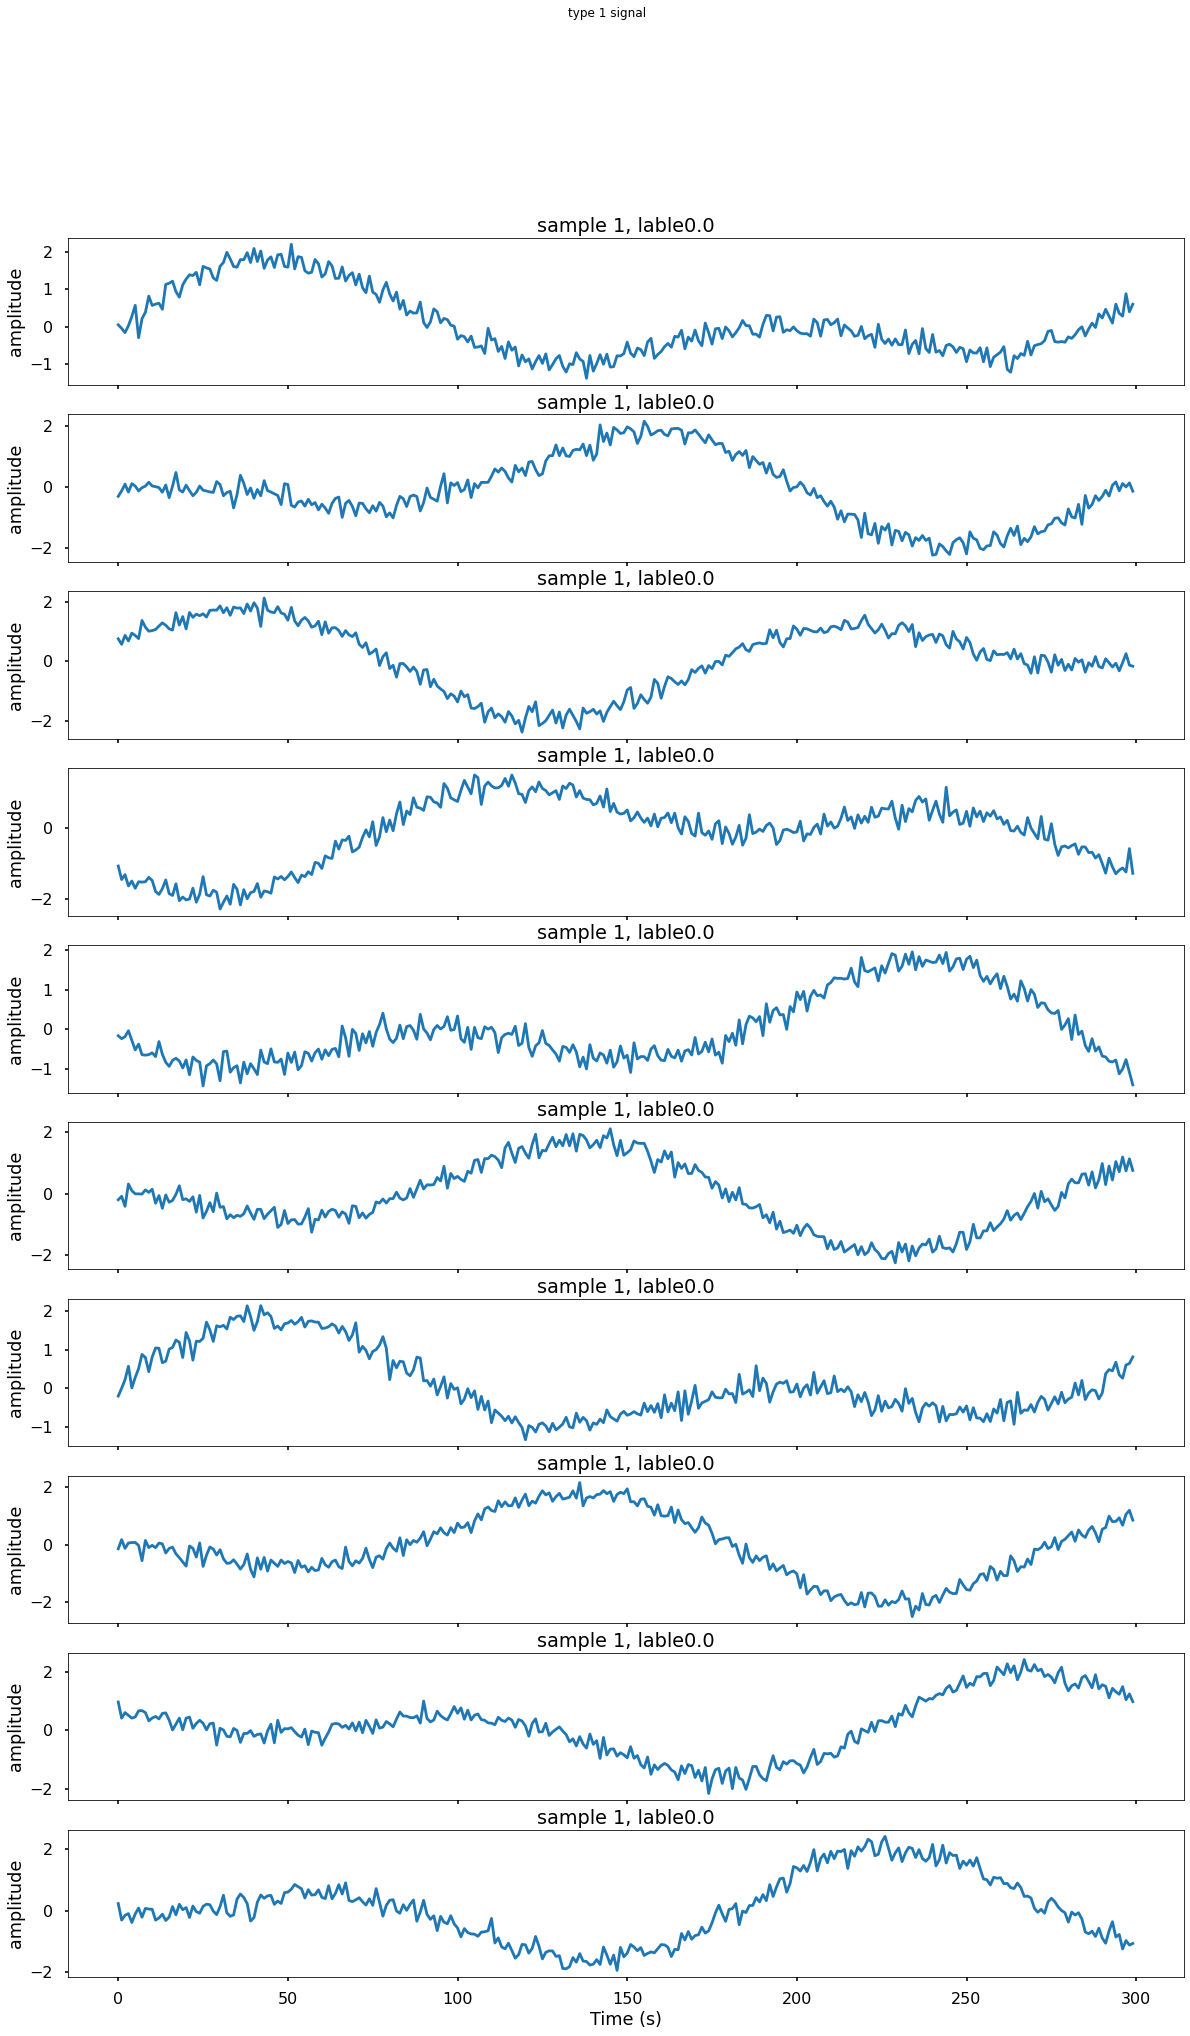

In [6]:
fig, axs = plt.subplots(10, 1, figsize=(20, 32))
fig.suptitle('type 1 signal')

axs[0].plot(npy_data[0][:300])
axs[0].set_title(f'sample 1, lable{npy_data[0][300]}')
axs[1].plot(npy_data[9][:300])
axs[1].set_title(f'sample 1, lable{npy_data[9][300]}')
axs[2].plot(npy_data[15][:300])
axs[2].set_title(f'sample 1, lable{npy_data[15][300]}')
axs[3].plot(npy_data[20][:300])
axs[3].set_title(f'sample 1, lable{npy_data[20][300]}')
axs[4].plot(npy_data[40][:300])
axs[4].set_title(f'sample 1, lable{npy_data[40][300]}')
axs[5].plot(npy_data[45][:300])
axs[5].set_title(f'sample 1, lable{npy_data[45][300]}')
axs[6].plot(npy_data[70][:300])
axs[6].set_title(f'sample 1, lable{npy_data[70][300]}')
axs[7].plot(npy_data[80][:300])
axs[7].set_title(f'sample 1, lable{npy_data[80][300]}')
axs[8].plot(npy_data[97][:300])
axs[8].set_title(f'sample 1, lable{npy_data[97][300]}')
axs[9].plot(npy_data[99][:300])
axs[9].set_title(f'sample 1, lable{npy_data[99][300]}')

for ax in axs.flat:
    ax.set(xlabel='Time (s)', ylabel='amplitude')

# Hide x labels and tick labels for all but bottom plot.
for ax in fig.get_axes():
    ax.label_outer()